## Dataset Link: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [19]:
## required libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

In [20]:
## reading dataset
df = pd.read_csv('/content/drive/MyDrive/Data/creditcard.csv')

## displaying first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
## shape of dataset
df.shape

(284807, 31)

In [23]:
## checking null values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [24]:
## count the occurance of unique values in class column
df.Class.value_counts()

,count
Class,
0,284315
1,492


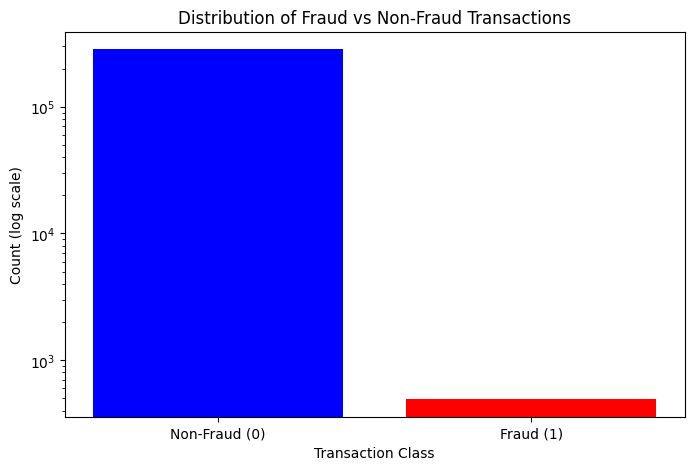

In [18]:
plt.figure(figsize=(8, 5))

# Count occurrences of each class
class_counts = df['Class'].value_counts()

# Create a bar plot using Matplotlib (faster)
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])

# Labels and title
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Transaction Class')
plt.ylabel('Count (log scale)')
plt.yscale('log')  # Log scale for better visualization
plt.title('Distribution of Fraud vs Non-Fraud Transactions')

# Show plot
plt.show()

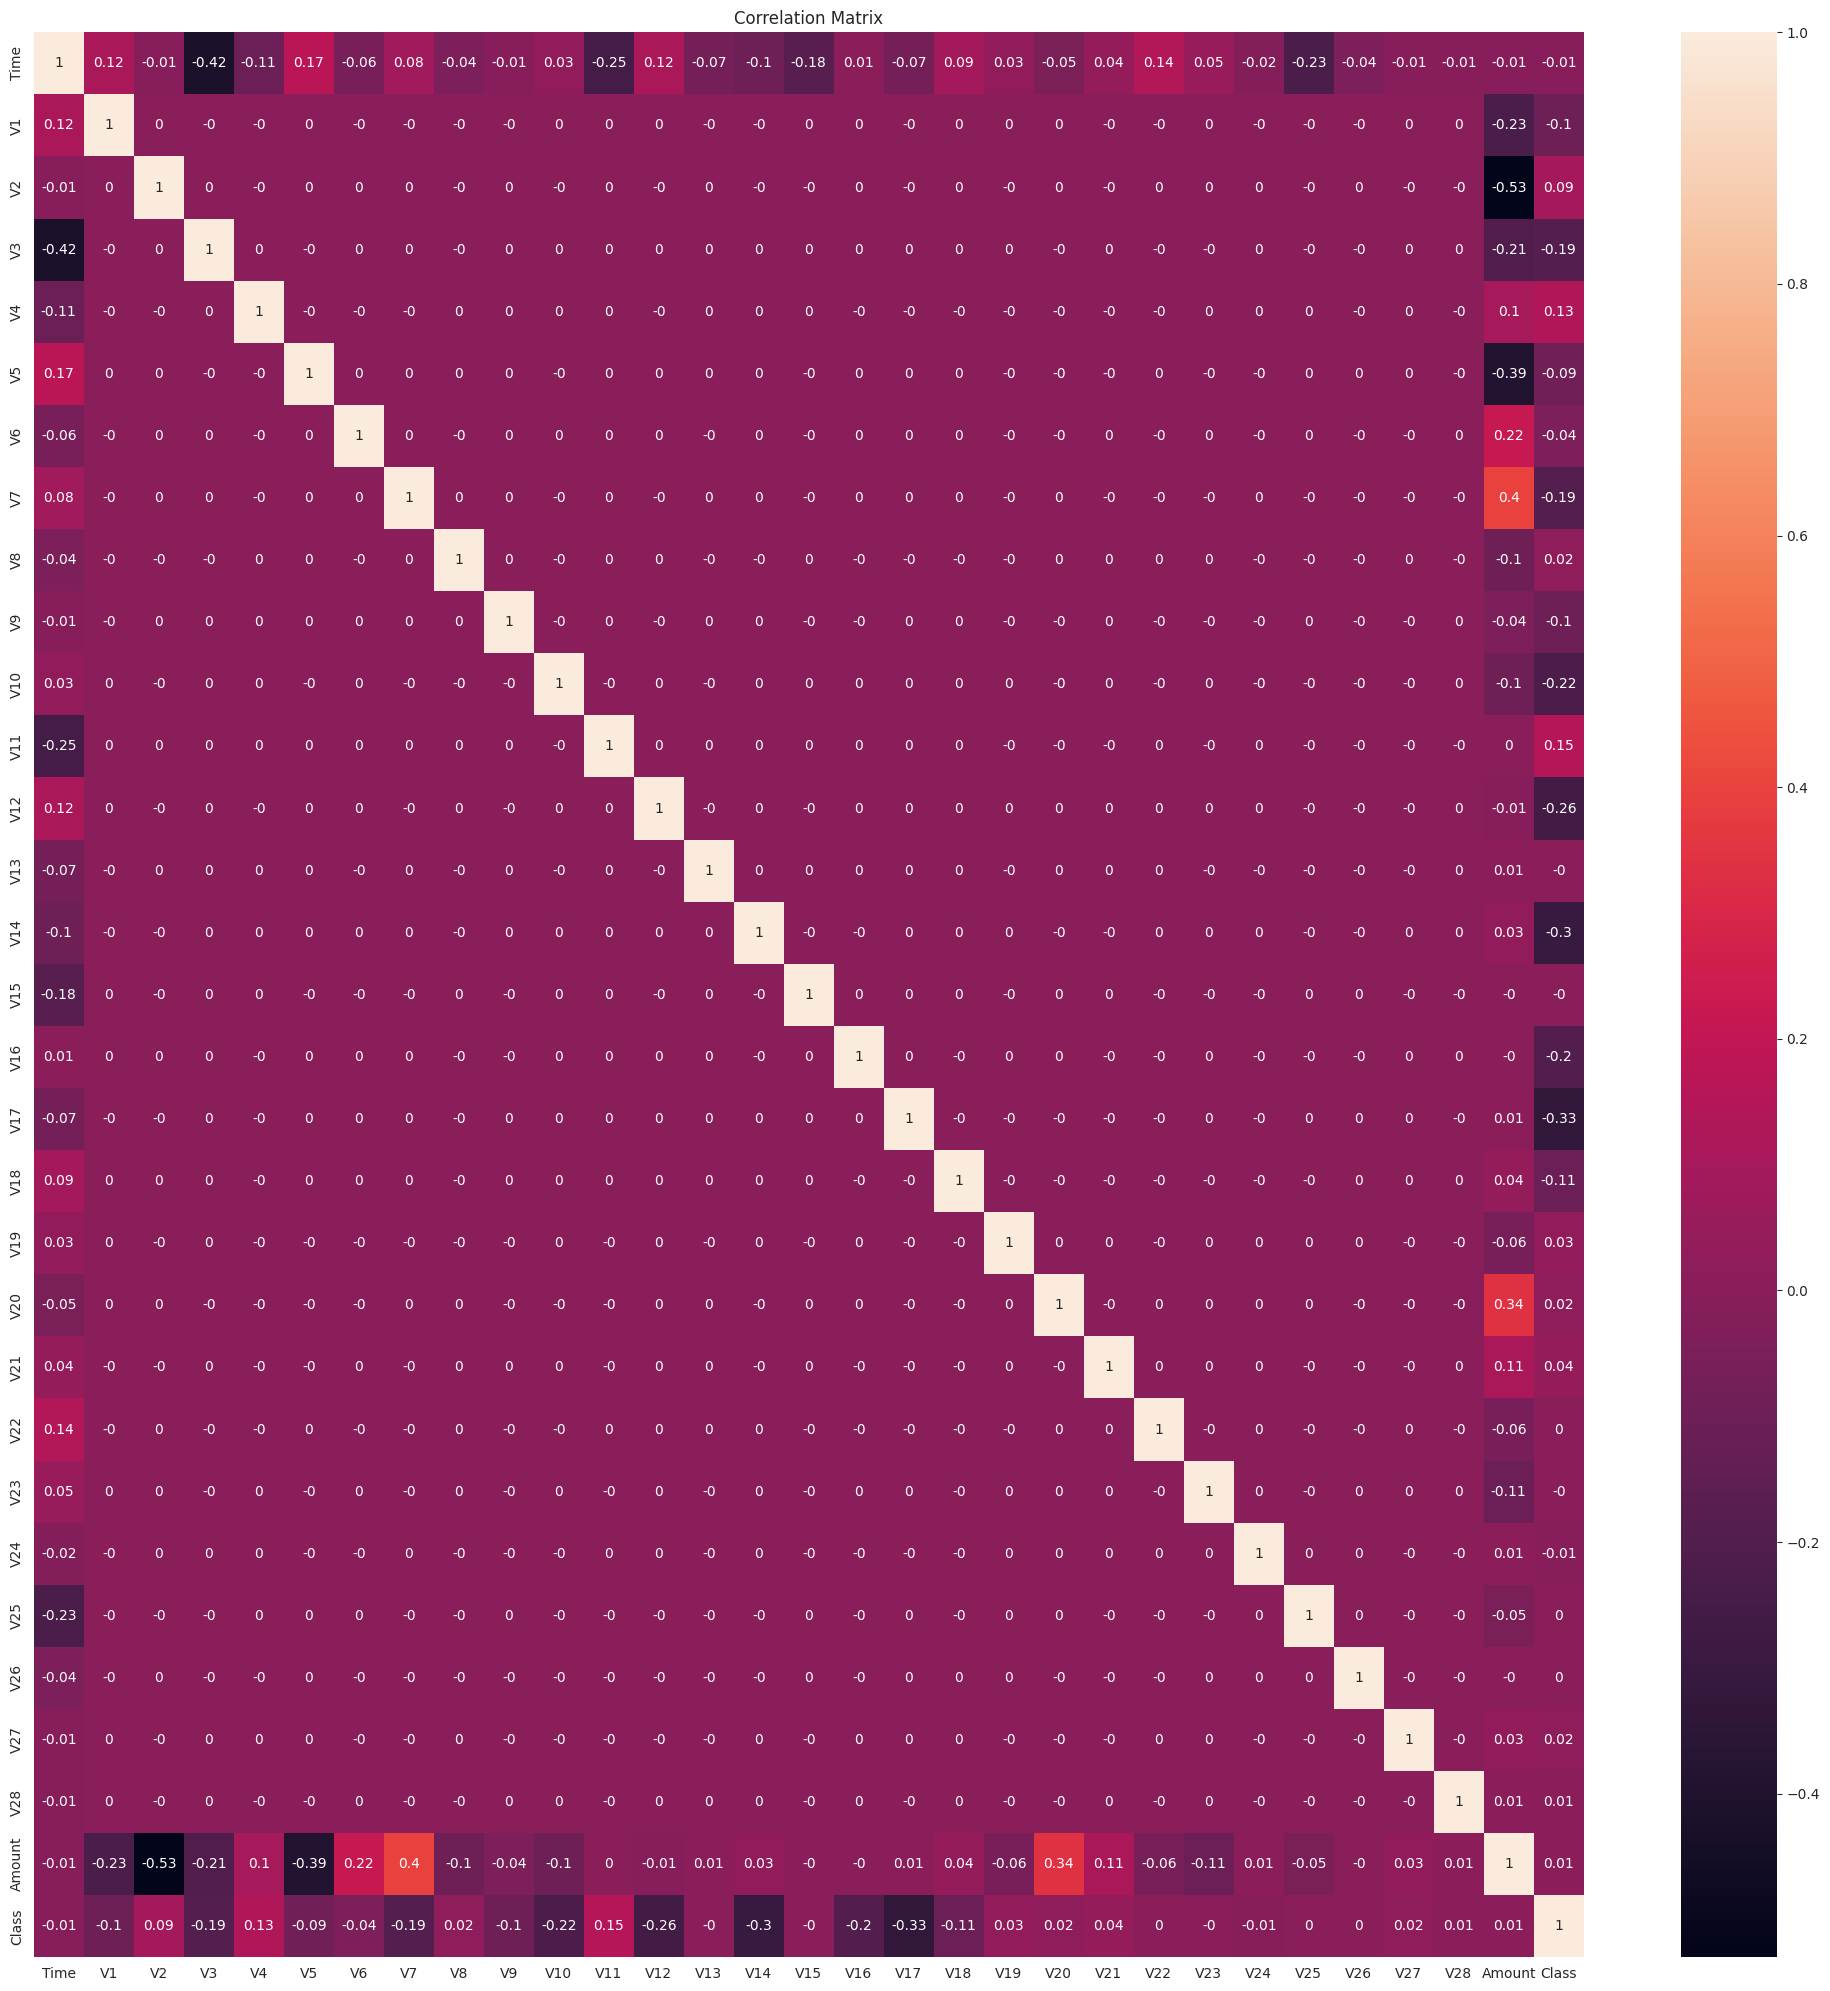

In [25]:
## checking correlation
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
sns.heatmap(round(df.corr(), 2), annot=True);

In [26]:
## checking correlation of 'dependent' variable with each "independent" variable
df.corr()[['Class']].sort_values(by='Class')[:-1]

,Class
V17,-0.326481
V14,-0.302544
V12,-0.260593
V10,-0.216883
V16,-0.196539
V3,-0.192961
V7,-0.187257
V18,-0.111485
V1,-0.101347
V9,-0.097733


In [27]:
## dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [29]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [30]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [31]:
## Standard Scaler
sc=  StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
print(X_train.shape)
print(X_test.shape)

(213605, 30)
(71202, 30)


## Logistic Regression

In [33]:
lg = LogisticRegression()

## fit on training data
lg.fit(X_train, y_train)

LogisticRegression()

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.89      0.67      0.76       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9992977725344794
----------------------------------------------------------------------------------------------------



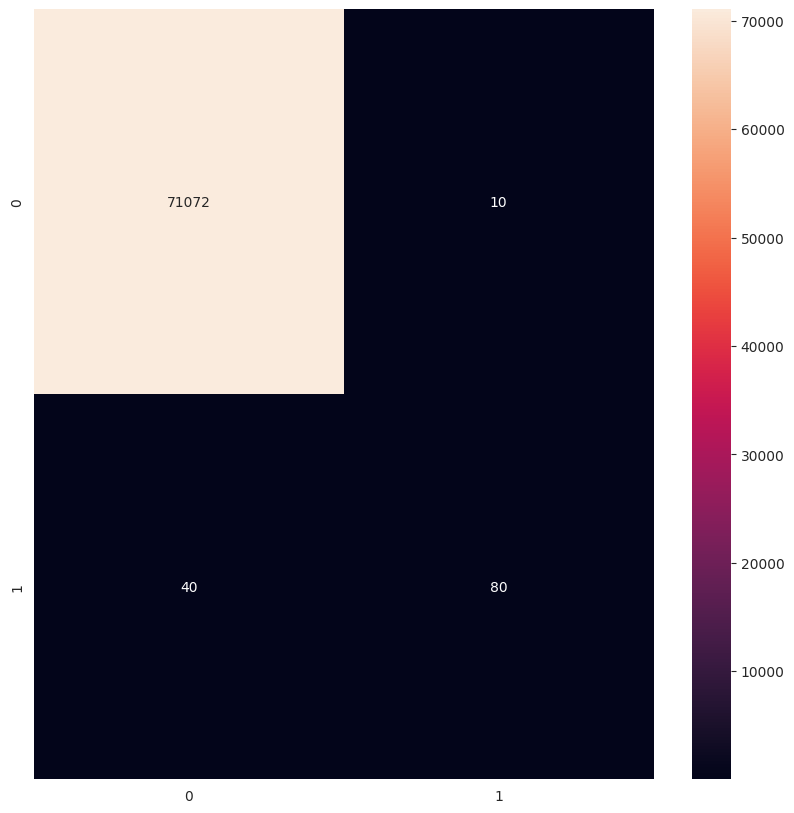

In [34]:
## prediction
pred = lg.predict(X_test)

print('Classification Report: \n', classification_report(y_test, pred))
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(y_test, pred))
print("-" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

## fit on training data
rf.fit(X_train, y_train)

RandomForestClassifier()

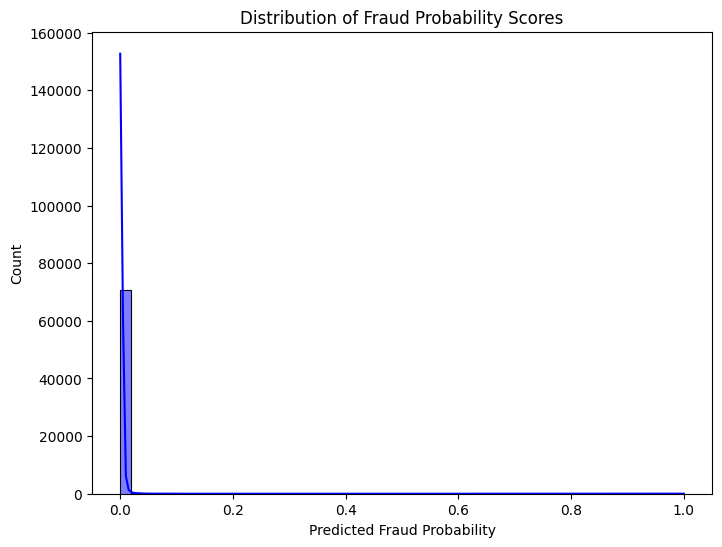

In [17]:
# Get the fraud probability scores (probability of class 1 - fraud)
pred_probs = rf.predict_proba(X_test)[:, 1]

# Plot the fraud probability distribution
plt.figure(figsize=(8, 6))
sns.histplot(pred_probs, bins=50, kde=True, color="blue")
plt.title('Distribution of Fraud Probability Scores')
plt.xlabel('Predicted Fraud Probability')
plt.ylabel('Count')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.00      0.00      0.00       120

    accuracy                           1.00     71202
   macro avg       0.50      0.50      0.50     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9983146540827504
----------------------------------------------------------------------------------------------------



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


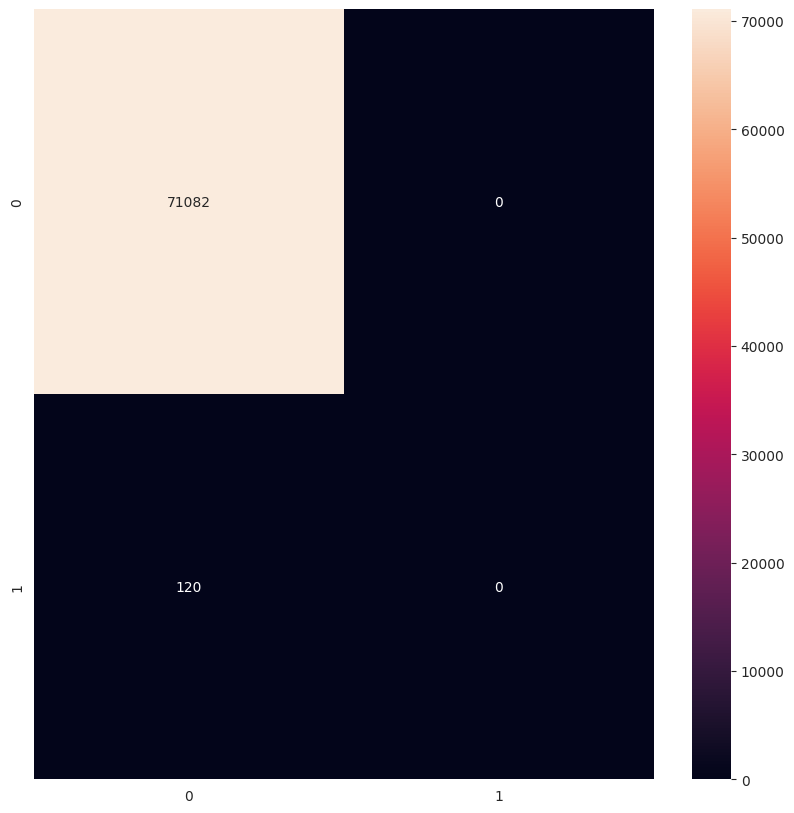

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # Import necessary functions
from sklearn.linear_model import LogisticRegression # Import Ordinal LogisticRegression
import seaborn as sns

# Assuming you have your features in 'X' and target in 'y'
# Load your dataframe here if 'df' is not already loaded
# Replace 'your_file.csv' with the actual path to your data file
df = pd.read_csv('/content/drive/MyDrive/Data/creditcard.csv')  # Load your dataframe

X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Initialize the models
svm_model = SVC(kernel='rbf', random_state=0)
lg = LogisticRegression() # Initialize LogisticRegression model

# Fit on training data
svm_model.fit(X_train, y_train)
lg.fit(X_train, y_train) # Fit LogisticRegression model

## prediction using the SVM model
svm_pred = svm_model.predict(X_test) # Use svm_model for prediction

# Evaluation using the SVM predictions
print('Classification Report: \n', classification_report(y_test, svm_pred)) # Now classification_report is defined
print("-" * 100)
print()
print('Accuracy Score: ', accuracy_score(y_test, svm_pred))
print("-" * 100)
print()
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='g');

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:21:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.84      0.86       120

    accuracy                           1.00     71202
   macro avg       0.94      0.92      0.93     71202
weighted avg       1.00      1.00      1.00     71202

----------------------------------------------------------------------------------------------------
XGBoost Accuracy Score: 0.9995365298727564
----------------------------------------------------------------------------------------------------


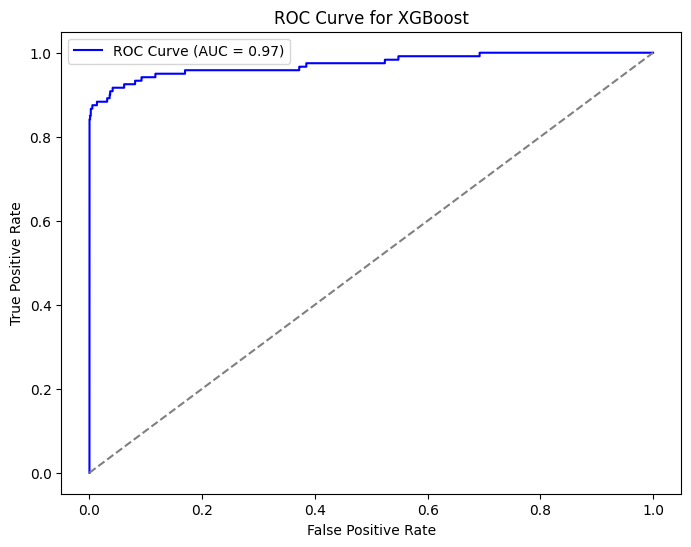

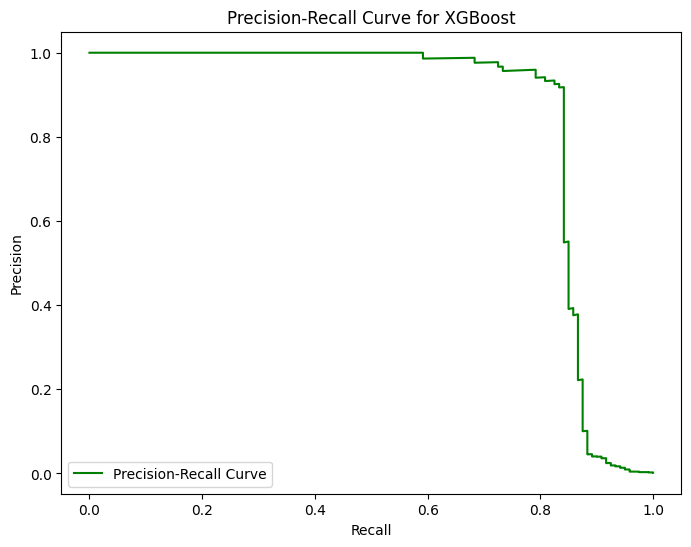

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np

# Handling class imbalance using scale_pos_weight
class_0, class_1 = y_train.value_counts()
scale_pos_weight = class_0 / class_1

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False,
                          eval_metric='logloss',
                          scale_pos_weight=scale_pos_weight,
                          random_state=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]  # Get probability scores

# Evaluate performance
print('XGBoost Classification Report:\n', classification_report(y_test, xgb_pred))
print("-" * 100)
print('XGBoost Accuracy Score:', accuracy_score(y_test, xgb_pred))
print("-" * 100)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, xgb_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, xgb_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend()
plt.show()
